In [168]:
import pandas as pd
pd.set_option("display.max_columns", None)
from nba_api.stats.static import teams

# NBA Analysis
## 3s Betting

#### What Do We Need?

###### - Logs Created Daily By Me
###### - Actual Gamelogs


#### What are we asking?

###### - Who gives up the most open 3s?
###### - Does this correlate to big games?
###### - If yes, Does this correlate to big wins?
###### - How can we improve?

### GAME LOGS

In [ ]:
gl = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/gamelogs23.csv', index_col=0)

In [174]:
player_ids = gl[['PLAYER_ID','TEAM_ID']].drop_duplicates()

In [244]:
gl['OPPONENT'] = gl['MATCHUP'].str.strip().str[-3:]
gl['GAME_DATE'] = gl['GAME_DATE'].str.strip().str[:10]
gl.rename(columns={'PLAYER_NAME':'PLAYER','TEAM_ABBREVIATION':'TEAM'},inplace=True)
gl_ = gl[['PLAYER','TEAM','MATCHUP','GAME_DATE','MIN','PTS']]


In [148]:
games_id = gl[['GAME_ID']].drop_duplicates()

### GAME Scores

In [151]:
from nba_api.stats.endpoints import teamgamelogs
from nba_api.stats.library.parameters import Season
from nba_api.stats.library.parameters import SeasonType


s = teamgamelogs.TeamGameLogs(season_nullable='2023-24').get_normalized_dict()

games = s['TeamGameLogs']
tm_gls = pd.DataFrame.from_dict(games)


In [152]:
tm_gls

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
0,2023-24,1610612744,GSW,Golden State Warriors,0022300576,2024-02-15T00:00:00,GSW @ UTA,W,48.0,49,92,0.533,20,42,0.476,22,28,0.786,13,28,41,42,13.0,8,6,3,19,22,140,3.0,1,1,1,1,81,159,484,250,49,232,160,331,323,836,351,1314,1004,5,666,539,464,241,696,348,54,705,1
1,2023-24,1610612757,POR,Portland Trail Blazers,0022300791,2024-02-15T00:00:00,POR vs. MIN,L,48.0,31,83,0.373,8,29,0.276,21,30,0.700,9,26,35,18,15.0,8,5,5,23,22,91,-37.0,1,821,821,821,81,1623,1301,1596,1430,1289,1405,409,217,1318,954,1460,1474,1569,1009,539,677,730,1294,348,1598,1621,1
2,2023-24,1610612749,MIL,Milwaukee Bucks,0022300790,2024-02-15T00:00:00,MIL @ MEM,L,48.0,42,90,0.467,11,44,0.250,15,20,0.750,11,33,44,24,14.0,10,5,3,22,16,110,-3.0,1,821,821,821,81,800,672,925,1017,147,1504,1043,989,1034,636,712,707,1068,824,218,677,241,1167,1247,1054,894,1
3,2023-24,1610612762,UTA,Utah Jazz,0022300576,2024-02-15T00:00:00,UTA vs. GSW,L,48.0,43,93,0.462,22,49,0.449,29,32,0.906,17,31,48,33,16.0,10,3,6,22,19,137,-3.0,1,821,821,821,81,674,414,977,19,33,266,53,142,173,79,963,354,162,1147,218,1177,965,1167,785,78,894,1
4,2023-24,1610612763,MEM,Memphis Grizzlies,0022300790,2024-02-15T00:00:00,MEM vs. MIL,W,48.0,44,83,0.530,13,26,0.500,12,19,0.632,7,33,40,30,16.0,9,3,5,16,22,113,3.0,1,1,1,1,81,555,1301,270,674,1505,75,1325,1083,1524,1280,712,1092,363,1147,351,1177,730,285,348,898,705,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2023-24,1610612738,BOS,Boston Celtics,0022300065,2023-10-25T00:00:00,BOS @ NYK,W,48.0,37,77,0.481,12,39,0.308,22,26,0.846,7,39,46,18,13.0,6,11,0,22,22,108,4.0,1,1,1,1,81,1346,1573,771,834,404,1251,331,452,437,1280,209,526,1569,666,993,21,1,1167,348,1145,667,1
1636,2023-24,1610612744,GSW,Golden State Warriors,0022300062,2023-10-24T00:00:00,GSW vs. PHX,L,48.0,36,101,0.356,10,43,0.233,22,28,0.786,18,31,49,19,11.0,11,6,7,23,22,104,-4.0,1,821,821,821,81,1426,67,1621,1187,185,1559,331,323,836,45,963,290,1531,337,127,464,1178,1294,348,1315,937,1
1637,2023-24,1610612747,LAL,Los Angeles Lakers,0022300061,2023-10-24T00:00:00,LAL @ DEN,L,48.0,41,90,0.456,10,29,0.345,15,20,0.750,13,31,44,23,12.0,5,4,6,18,15,107,-12.0,1,821,821,821,81,926,672,1069,1187,1289,969,1043,989,1034,351,963,707,1188,509,1225,913,965,542,1357,1189,1290,1
1638,2023-24,1610612756,PHX,Phoenix Suns,0022300062,2023-10-24T00:00:00,PHX @ GSW,W,48.0,42,95,0.442,11,33,0.333,13,17,0.765,17,43,60,23,19.0,5,7,6,22,23,108,4.0,1,1,1,1,81,800,262,1215,1017,918,1027,1240,1244,966,79,40,8,1188,1472,1225,304,965,1167,252,1145,667,1


### Shooting Details

##### Location
##### Closest Defender
##### Pullup/Spotup

In [155]:
shooting_tight = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/shots_tight_23.csv', index_col = 0)
shooting_vtight = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/shots_verytight_23.csv', index_col = 0)
shooting_open = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/shots_open_23.csv', index_col = 0)
shooting_wopen = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/shots_wideopen_23.csv', index_col = 0)
shooting_tight_10 = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/shots_tight_10_23.csv', index_col = 0)
shooting_vtight_10 = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/shots_verytight_10_23.csv', index_col = 0)
shooting_open_10 = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/shots_open_10_23.csv', index_col = 0)
shooting_wopen_10 = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/shots_wideopen_10_23.csv', index_col = 0)

In [234]:
shooting_tight

,PLAYER,TEAM,AGE,GP,G,FREQ%,FGM,FGA,FG%,EFG%,2FG FREQ%,2FGM,2FGA,2FG%,3FG FREQ%,3PM,3PA,3P%,GAME_DATE,Distance Defender,NO_ALL
0,Kevin Durant,PHX,35,1,1,63.6,3.0,14.0,21.4,21.4,63.6,3.0,14.0,21.4,0.0,0.0,0.0,-,2023-10-24,Tight,No All
1,Nikola Jokic,DEN,28,1,1,45.5,7.0,10.0,70.0,70.0,45.5,7.0,10.0,70.0,0.0,0.0,0.0,-,2023-10-24,Tight,No All
2,Devin Booker,PHX,27,1,1,42.9,6.0,9.0,66.7,66.7,38.1,6.0,8.0,75.0,4.8,0.0,1.0,0.0,2023-10-24,Tight,No All
3,LeBron James,LAL,38,1,1,43.8,4.0,7.0,57.1,57.1,37.5,4.0,6.0,66.7,6.3,0.0,1.0,0.0,2023-10-24,Tight,No All
4,Rui Hachimura,LAL,25,1,1,70.0,3.0,7.0,42.9,42.9,50.0,3.0,5.0,60.0,20.0,0.0,2.0,0.0,2023-10-24,Tight,No All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Colby Jones,SAC,21,1,1,33.3,0.0,1.0,0.0,0.0,33.3,0.0,1.0,0.0,0.0,0.0,0.0,-,2024-02-09,Tight,NaN
104,JT Thor,CHA,21,1,1,100.0,0.0,1.0,0.0,0.0,100.0,0.0,1.0,0.0,0.0,0.0,0.0,-,2024-02-09,Tight,NaN
105,Harrison Barnes,SAC,31,1,1,16.7,0.0,1.0,0.0,0.0,16.7,0.0,1.0,0.0,0.0,0.0,0.0,-,2024-02-09,Tight,NaN
106,Jordan Nwora,TOR,25,1,1,50.0,0.0,1.0,0.0,0.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0,-,2024-02-09,Tight,NaN


In [156]:
col = ['PLAYER', 'AGE', 'FGM', 'FGA', 'FG%', '2FGM', '2FGA', '2FG%', '3PM', '3PA',
       '3P%', 'GAME_DATE', 'Distance Defender']

shooting_l = [shooting_tight, shooting_vtight, shooting_open, shooting_wopen,shooting_tight_10, shooting_vtight_10, shooting_open_10, shooting_wopen_10 ]

def get_shooting():
    
    
    

,PLAYER,TEAM,AGE,GP,G,FREQ%,FGM,FGA,FG%,EFG%,2FG FREQ%,2FGM,2FGA,2FG%,3FG FREQ%,3PM,3PA,3P%,GAME_DATE,Distance Defender,NO_ALL
0,Kevin Durant,PHX,35,1,1,63.6,3.0,14.0,21.4,21.4,63.6,3.0,14.0,21.4,0.0,0.0,0.0,-,2023-10-24,Tight,No All
1,Nikola Jokic,DEN,28,1,1,45.5,7.0,10.0,70.0,70.0,45.5,7.0,10.0,70.0,0.0,0.0,0.0,-,2023-10-24,Tight,No All
2,Devin Booker,PHX,27,1,1,42.9,6.0,9.0,66.7,66.7,38.1,6.0,8.0,75.0,4.8,0.0,1.0,0.0,2023-10-24,Tight,No All
3,LeBron James,LAL,38,1,1,43.8,4.0,7.0,57.1,57.1,37.5,4.0,6.0,66.7,6.3,0.0,1.0,0.0,2023-10-24,Tight,No All
4,Rui Hachimura,LAL,25,1,1,70.0,3.0,7.0,42.9,42.9,50.0,3.0,5.0,60.0,20.0,0.0,2.0,0.0,2023-10-24,Tight,No All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Colby Jones,SAC,21,1,1,33.3,0.0,1.0,0.0,0.0,33.3,0.0,1.0,0.0,0.0,0.0,0.0,-,2024-02-09,Tight,NaN
104,JT Thor,CHA,21,1,1,100.0,0.0,1.0,0.0,0.0,100.0,0.0,1.0,0.0,0.0,0.0,0.0,-,2024-02-09,Tight,NaN
105,Harrison Barnes,SAC,31,1,1,16.7,0.0,1.0,0.0,0.0,16.7,0.0,1.0,0.0,0.0,0.0,0.0,-,2024-02-09,Tight,NaN
106,Jordan Nwora,TOR,25,1,1,50.0,0.0,1.0,0.0,0.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0,-,2024-02-09,Tight,NaN


In [190]:
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.library.parameters import Season
from nba_api.stats.library.parameters import SeasonType
shots = []


for index, row in player_ids.iterrows():
    p = row['PLAYER_ID']
    t = row['TEAM_ID']
    roster = shotchartdetail.ShotChartDetail(season_nullable="2022-23",player_id=p, team_id=t) 
    r = roster.get_normalized_dict()
    tms = r['Shot_Chart_Detail']
    df = pd.DataFrame.from_dict(tms)
    shots.append(df)
shots_detail = pd.concat(shots)

In [192]:
shots_detail.to_csv('shot_detail_2024.csv')

### Player Data Types

### DEF/OPPONENT DETAILS

In [194]:
z = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/players_3p_logs_23.csv')
gl = pd.read_csv('/Users/sethmiller/Documents/NBA/NBA 2023-24 Season/gamelogs23.csv', index_col=0)

/var/folders/sj/rsx4zyld6flczf6q6r20b1c80000gn/T/ipykernel_75914/4036808611.py:1: DtypeWarning:

Columns (135,141,143,144,145,154,175,176,202,203,210,211,218,219,226,227) have mixed types. Specify dtype option on import or set low_memory=False.



In [195]:
gl['OPPONENT'] = gl['MATCHUP'].str.strip().str[-3:]

In [196]:
gl_p = gl[['GAME_ID','GAME_DATE','PLAYER_ID','PLAYER_NAME','OPPONENT','FG3M','FG3A']]

In [197]:
avgs = gl_p.groupby(['PLAYER_ID','PLAYER_NAME'])[['FG3M','FG3A']].mean().round(1).reset_index()
avgs.rename(columns={'FG3M':'FG3M-avg','FG3A':'FG3A-avg'}, inplace=True)

In [198]:
df = z.loc[:, ~z.columns.str.contains('^Unnamed')]

In [199]:
df

,PLAYER,TEAM,OPPONENT,MIN,FG3M,GAME_DATE,player_roles,3PM_q,Tot_3P_(%),Tot_3P_rate,DEF_3_Rate+,DEF_3q,DEF_3P_rate,DEF_3p_rank,REB,UNCONTESTED_REB%,REB_group,DEF_TOT_REB,DEF_UCReb%,Def_rank,DEF UC +/-,UNCONTESTED_Rate+,UC_REBq,PTS,Mid_q,Paint_q,drives_q,Tot_paint_(%),Tot_paint_rate,DRIVES/MIN,DRIVE_SUCCESS_RATE,DRIVES_AST_RATE,Tot_mid_(%),Tot_mid_rate,DEF_Mid_Rate+,DEF_MIDq,DEF_Paint_rank,DEF_D/MIN,DEF_DSR,DEF_DAR,DEF_Drive_rank,OPEN_%,3PM_q2,DEF_3v2_Rate+,DEF_3q2,Secondary Shooters,Games_threes,PTS_dif_threes,Paint_plus_threes,Mid_plus_threes,3p_plus_threes,Games_secondary,PTS_dif_secondary,Paint_plus_secondary,Mid_plus_secondary,3p_plus_secondary,Downhill,PickNRoll,PickNPop,3pt,Shot Creator,Games_dh,PTS_dif_dh,Paint_plus_dh,Mid_plus_dh,3p_plus_dh,Games_pnr,PTS_dif_pnr,Paint_plus_pnr,Mid_plus_pnr,3p_plus_pnr,Games_pnp,PTS_dif_pnp,Paint_plus_pnp,Mid_plus_pnp,3p_plus_pnp,Games_creator,PTS_dif_creator,Paint_plus_creator,Mid_plus_creator,3p_plus_creator,PTS_OVER_pnp,3PM_OVER_pnp,pnp_q,pnp_3q,trys_pnp,3PM/G_pnp,3PM_O_pnp,3PM_O+_pnp,PTS_OVER_creator,3PM_OVER_creator,creator_q,creator_3q,trys_creator,3PM/G_creator,3PM_O_creator,3PM_O+_creator,PTS_OVER_threes,3PM_OVER_threes,threes_q,threes_3q,trys_threes,3PM/G_threes,3PM_O_threes,3PM_O+_threes,PTS_OVER_secondary,3PM_OVER_secondary,secondary_q,secondary_3q,trys_secondary,3PM/G_secondary,3PM_O_secondary,3PM_O+_secondary
0,Aaron Gordon,DEN,GSW,30.77,0.50,2023-11-08,Versitile Bigs,Gold,0.231,2.213,102.559441,MID,2.335219,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nikola Jokic,DEN,GSW,33.95,1.50,2023-11-08,Versitile Bigs,Bronze,0.393,4.231,125.356556,BUNS,2.335219,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jamal Murray,DEN,GSW,30.85,2.00,2023-11-08,Secondary Ball Handlers,Gold,0.438,5.579,102.559441,MID,5.776872,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Reggie Jackson,DEN,GSW,21.82,1.25,2023-11-08,Secondary Ball Handlers,Gold,0.304,5.547,102.559441,MID,5.776872,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kentavious Caldwell-Pope,DEN,GSW,32.53,1.88,2023-11-08,Glue Guys,Gold,0.464,4.373,102.559441,MID,5.706773,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [200]:
plyr_3s = df[df['Shot Creator']=='Yes'][['PLAYER','GAME_DATE','OPPONENT','Shot Creator']]

In [201]:
plyr_3s['GAME_DATE'] = pd.to_datetime(plyr_3s['GAME_DATE'])

In [202]:
threes = df[df['3p_plus_creator'].notna()].groupby(['OPPONENT','GAME_DATE'])[['3p_plus_pnp','3p_plus_threes','3p_plus_creator','3p_plus_secondary','DEF_3P_rate','DEF_3v2_Rate+','DEF_3_Rate+']].max().reset_index()

In [205]:
threes1 = threes.loc[threes['DEF_3P_rate'].notna()]

In [218]:
threes1

,OPPONENT,GAME_DATE,3p_plus_pnp,3p_plus_threes,3p_plus_creator,3p_plus_secondary,DEF_3P_rate,DEF_3v2_Rate+,DEF_3_Rate+
3,ATL,2023-12-11,7.905946,34.977620,20.258346,30.961018,7.080021,113.877309,115.922110
4,ATL,2023-12-13,1.146397,39.916288,20.175593,23.769641,6.732685,112.500386,114.033017
5,ATL,2023-12-15,-0.201460,0.905705,0.740691,0.770184,6.732685,112.500386,114.033017
6,ATL,2023-12-16,-0.058719,0.905705,0.695230,0.770184,7.008981,112.500386,114.033017
7,ATL,2023-12-18,-0.134091,0.937756,0.750229,0.549397,7.008981,112.259176,110.905038
...,...,...,...,...,...,...,...,...,...
1043,WAS,2024-02-07,-0.207078,-0.381449,-0.155721,-0.278280,6.261598,101.420570,104.171876
1044,WAS,2024-02-09,-0.207078,-0.381449,-0.155721,-0.278280,6.261598,101.420570,104.171876
1045,WAS,2024-02-10,-0.217247,-0.426873,-0.169949,-0.203604,6.231075,100.058719,100.366766
1046,WAS,2024-02-12,-0.217247,-0.426873,-0.169949,-0.203604,6.231075,100.058719,100.366766


In [112]:
threes1 = threes[threes['3p_plus_pnp'].notna()]

In [212]:
threes1['GAME_DATE'] = pd.to_datetime(threes1['GAME_DATE'])

/var/folders/sj/rsx4zyld6flczf6q6r20b1c80000gn/T/ipykernel_75914/2198015665.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [209]:
a = pd.to_datetime("2023-12-16")

In [126]:
threes2 = threes[threes['GAME_DATE']>=a]

In [210]:
gl_p['GAME_DATE'] = pd.to_datetime(gl_p['GAME_DATE'])

/var/folders/sj/rsx4zyld6flczf6q6r20b1c80000gn/T/ipykernel_75914/1443770502.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
mg1 = threes1.merge(plyr_3s)
mg1.rename(columns={'PLAYER':'PLAYER_NAME'}, inplace=True)
mg2 = mg1.merge(avgs)
mg3 = mg2.merge(gl_p)

In [231]:
#mg3.info()

In [232]:
mg3['3plus'] = 0
mg3.loc[mg3['FG3M']>(mg3['FG3M-avg']+2), '3plus']=1

In [233]:
mg3[['3p_plus_pnp', '3p_plus_threes',
       '3p_plus_creator', '3p_plus_secondary', 'DEF_3v2_Rate+',
       'DEF_3_Rate+','3plus','FG3M']].corr()

,3p_plus_pnp,3p_plus_threes,3p_plus_creator,3p_plus_secondary,DEF_3v2_Rate+,DEF_3_Rate+,3plus,FG3M
3p_plus_pnp,1.000000,0.008495,0.219726,0.433867,0.104164,0.069432,-0.011208,0.007568
3p_plus_threes,0.008495,1.000000,0.505373,0.367656,0.083527,0.098737,-0.014473,-0.023707
3p_plus_creator,0.219726,0.505373,1.000000,0.304617,0.029011,0.047414,0.012435,0.017160
3p_plus_secondary,0.433867,0.367656,0.304617,1.000000,0.154701,0.116237,0.020705,0.031803
DEF_3v2_Rate+,0.104164,0.083527,0.029011,0.154701,1.000000,0.828875,0.008103,-0.011124
DEF_3_Rate+,0.069432,0.098737,0.047414,0.116237,0.828875,1.000000,-0.020376,-0.039000
3plus,-0.011208,-0.014473,0.012435,0.020705,0.008103,-0.020376,1.000000,0.672413
FG3M,0.007568,-0.023707,0.017160,0.031803,-0.011124,-0.039000,0.672413,1.000000


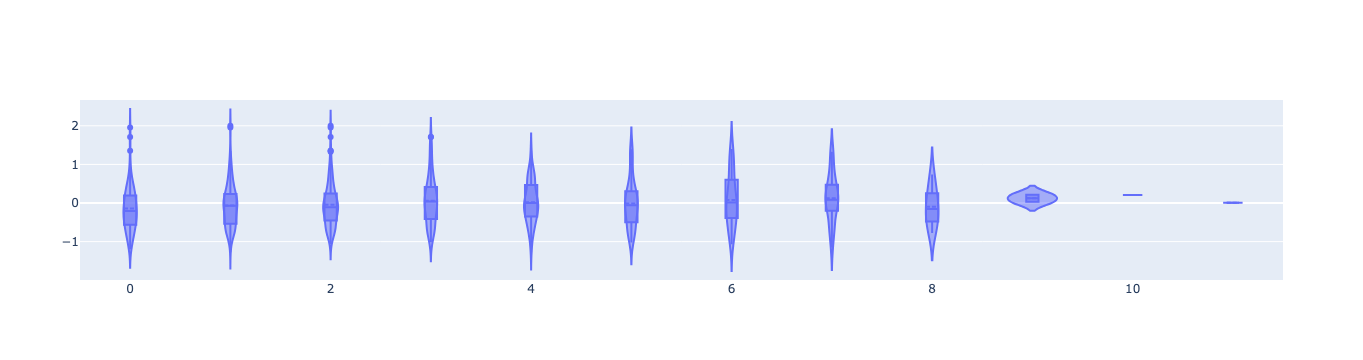

In [136]:
import plotly.express as px
#df = px.data.iris() # iris is a pandas DataFrame
fig = go.Figure()
fig.add_trace(go.Violin(x=mg3['FG3M'],
                            y=mg3['3p_plus_creator'],
                            box_visible=True,
                            meanline_visible=True))
fig.show()

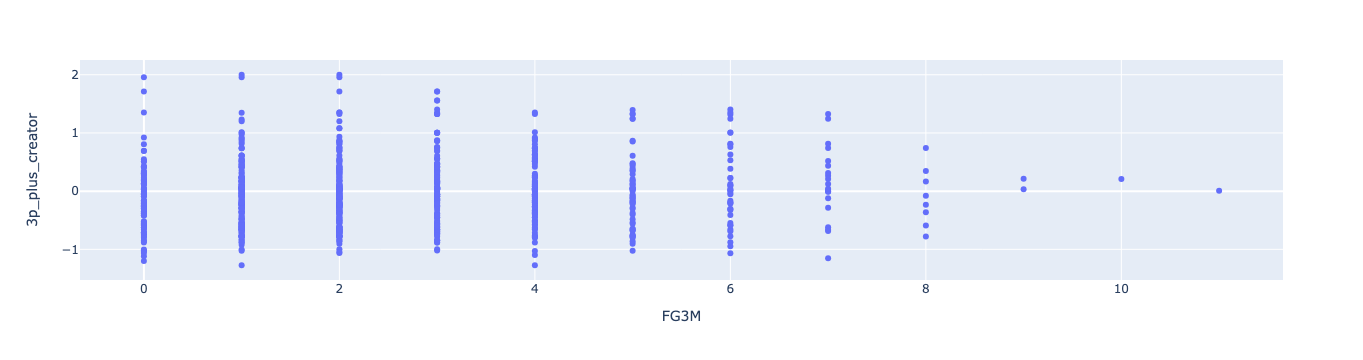

In [138]:
import plotly.express as px

fig = px.scatter(mg3, x="FG3M", y="3p_plus_creator")
fig.show()

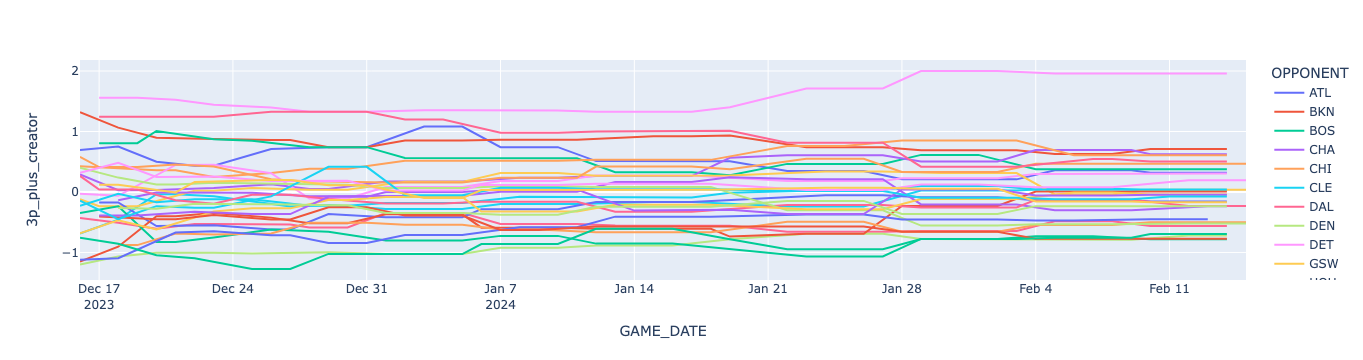

In [137]:
import plotly.express as px

fig = px.line(threes2, x="GAME_DATE", y="3p_plus_creator", color='OPPONENT')
fig.show()